# Final Project For Machine Learning Model For Churn Prediction


## Problem Statement:

 ## A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
## Your task as a data scientist would be to predict the propensity to churn for each customer.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data=pd.read_csv(r"C:\Users\salik\Downloads\churn_prediction.csv")

In [31]:
data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [32]:
data.shape

(28382, 21)

In [33]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [34]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [35]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [36]:
data['gender'].fillna('Male',inplace=True)

In [37]:
data['dependents'].fillna(0,inplace=True)

In [38]:
data['dependents'].value_counts()

0.0     23898
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [39]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [40]:
data['occupation'].fillna('self_employed',inplace=True)

In [41]:
data['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [42]:
data['city'].fillna(1020,inplace=True)

In [43]:
data['days_since_last_transaction']

0        224.0
1         60.0
2          NaN
3        147.0
4         58.0
         ...  
28377     70.0
28378     14.0
28379      0.0
28380      NaN
28381     59.0
Name: days_since_last_transaction, Length: 28382, dtype: float64

In [44]:
data['days_since_last_transaction'].mean()

69.99781390357327

In [45]:
data['days_since_last_transaction'].fillna(70,inplace=True)

In [46]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [47]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [48]:
data=data.drop(['customer_id'],axis=1)

In [49]:
data=pd.get_dummies(data)

In [50]:
data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,310,35,0.0,1020.0,2,3214,60.0,5390.37,8704.66,7799.26,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,2356,31,0.0,146.0,2,41,70.0,3913.16,5815.29,4910.17,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,478,90,0.0,1020.0,2,582,147.0,2291.91,2291.91,2084.54,...,2291.91,1669.79,1,0,1,0,0,0,1,0
4,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,...,1157.15,1677.16,1,0,1,0,0,0,1,0


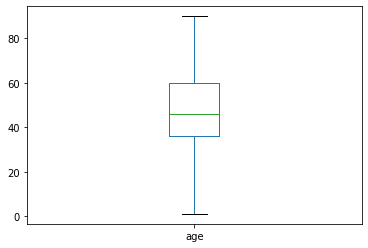

In [51]:
data['age'].plot.box()

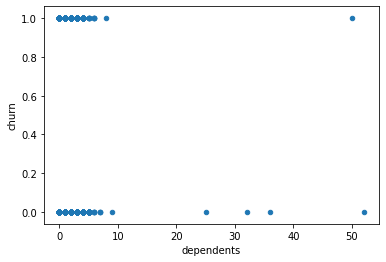

In [52]:
data.plot.scatter('dependents','churn')

In [53]:
data.corr()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
vintage,1.000000,0.227390,0.068588,0.041720,-0.167366,-0.380714,-0.084282,0.002986,0.004518,0.003433,...,0.001638,0.003448,-0.064637,-0.039276,0.039276,0.035027,0.057813,0.041924,-0.013189,-0.106399
age,0.227390,1.000000,0.001261,0.014564,-0.076532,-0.058990,-0.015311,0.054346,0.058342,0.061708,...,0.057662,0.060297,-0.020012,-0.089528,0.089528,0.045605,0.372942,-0.129008,0.153136,-0.452218
dependents,0.068588,0.001261,1.000000,0.003287,0.007917,-0.001704,-0.082712,-0.003838,-0.002181,-0.001786,...,-0.002769,-0.001672,0.029335,-0.176027,0.176027,-0.004590,-0.054831,0.044848,0.037310,-0.088262
city,0.041720,0.014564,0.003287,1.000000,0.009323,-0.055779,-0.002951,-0.006220,-0.004634,-0.006799,...,-0.006355,-0.006318,-0.000883,-0.004317,0.004317,0.002009,-0.004232,0.003649,0.000163,-0.002373
customer_nw_category,-0.167366,-0.076532,0.007917,0.009323,1.000000,0.235059,0.047040,-0.058314,-0.059854,-0.059535,...,-0.058648,-0.059113,0.006551,-0.042773,0.042773,0.002814,0.011718,0.040449,-0.021901,-0.037264
branch_code,-0.380714,-0.058990,-0.001704,-0.055779,0.235059,1.000000,0.036956,0.000181,0.000214,0.001955,...,0.001031,0.002080,0.035469,-0.068892,0.068892,-0.008184,-0.004395,-0.033180,0.053324,-0.039988
days_since_last_transaction,-0.084282,-0.015311,-0.082712,-0.002951,0.047040,0.036956,1.000000,-0.019538,-0.014068,-0.012409,...,-0.017424,-0.011466,-0.053825,0.073783,-0.073783,0.000798,-0.005629,-0.044127,0.008953,0.060976
current_balance,0.002986,0.054346,-0.003838,-0.006220,-0.058314,0.000181,-0.019538,1.000000,0.947276,0.958307,...,0.983412,0.942207,-0.024181,-0.017821,0.017821,0.000772,-0.006112,0.000760,0.012773,-0.019217
previous_month_end_balance,0.004518,0.058342,-0.002181,-0.004634,-0.059854,0.000214,-0.014068,0.947276,1.000000,0.970530,...,0.974714,0.969605,0.006886,-0.019206,0.019206,-0.001113,-0.005698,-0.001456,0.014918,-0.019741
average_monthly_balance_prevQ,0.003433,0.061708,-0.001786,-0.006799,-0.059535,0.001955,-0.012409,0.958307,0.970530,1.000000,...,0.976290,0.994038,0.011960,-0.018923,0.018923,-0.000035,-0.006766,-0.001971,0.016129,-0.020262


In [54]:
from sklearn.model_selection import train_test_split as tts
x=data.drop(['churn'],axis=1)
y=data['churn']

In [55]:
x.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,...,0.20,1458.71,1458.71,0,1,0,0,0,1,0
1,310,35,0.0,1020.0,2,3214,60.0,5390.37,8704.66,7799.26,...,100.56,6496.78,8787.61,0,1,0,0,0,1,0
2,2356,31,0.0,146.0,2,41,70.0,3913.16,5815.29,4910.17,...,259.23,5006.28,5070.14,0,1,0,0,1,0,0
3,478,90,0.0,1020.0,2,582,147.0,2291.91,2291.91,2084.54,...,2143.33,2291.91,1669.79,0,1,0,0,0,1,0
4,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,...,1538.06,1157.15,1677.16,0,1,0,0,0,1,0


In [56]:
y

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int64

In [57]:
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.3,random_state=1)

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfs=RandomForestClassifier(n_estimators=100, max_depth= 5, random_state=2)
rfs.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [61]:
pred_trainx=rfs.predict_proba(train_x)
pred_testx=rfs.predict_proba(test_x)

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_y,pred_trainx[:,1])


0.8306119149880554

In [68]:
#Here is the accuracy we got by implementing Random Forest Clasifier Algorithm 
print("Accuracy Obtained: ",roc_auc_score(test_y,pred_testx[:,1]))

Accuracy Obtained:  0.8156843505931282
